In [1]:
import collections
import csv
import functools
import operator
from collections import Counter
from random import randint

import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Player:

    def __init__(self, name, position, movements):
        self.name = name
        self.position = position
        self.movements = movements
    
    def give_name(self):
        return self.name
    
    def give_position(self):
        return self.position
    
    def give_movements(self):
        return self.movements
    
    def change_position(self, new_pos):
        self.position = new_pos
        
    def update_movements(self, mov):
        self.movements.append(mov)

In [3]:
def roll (player):
    d1=randint(1,6)
    d2=randint(1,6)
    player.change_position( (player.give_position()+d1+d2)%40 )

In [4]:
p1 = Player("P1", 0, [])
p2 = Player("P2", 0, [])
p3 = Player("P3", 0, [])
p4 = Player("P4", 0, [])
        
p1_games = []
p2_games = []
p3_games = []
p4_games = []
        
player_list = [p1,p2,p3,p4]
pos_list = np.arange(0,41)

In [5]:
def game(player_list):
    for var in range(0,50):
        for player in player_list:
            roll(player)
            player.update_movements( player.give_position() )

In [6]:
#Simulate games and save the movements on pn_games
def simulate_games(n):
    for var in range(n):
        p1 = Player("P1", 0, [])
        p2 = Player("P2", 0, [])
        p3 = Player("P3", 0, [])
        p4 = Player("P4", 0, [])
        
        
        player_list = [p1,p2,p3,p4]

        game(player_list)
        
        p1_games.append(dict( Counter(p1.give_movements()) ) )
        p2_games.append(dict( Counter(p2.give_movements()) ) )
        p3_games.append(dict( Counter(p3.give_movements()) ) )
        p4_games.append(dict( Counter(p4.give_movements()) ) )
        
        del p1, p2, p3, p4
    

In [7]:
simulate_games(1000)

In [8]:
counter = collections.Counter()
    
for d in p1_games: 
    counter.update(d)        

counter = collections.Counter()
for d in p1_games: 
    counter.update(d)

In [9]:
stats={}
for i in sorted(counter):
   stats[i]=counter[i]
print(stats)

{0: 1157, 1: 1240, 2: 1239, 3: 1193, 4: 1220, 5: 1247, 6: 1306, 7: 1313, 8: 1370, 9: 1353, 10: 1298, 11: 1315, 12: 1234, 13: 1304, 14: 1283, 15: 1280, 16: 1277, 17: 1285, 18: 1234, 19: 1268, 20: 1272, 21: 1293, 22: 1263, 23: 1214, 24: 1276, 25: 1254, 26: 1169, 27: 1209, 28: 1203, 29: 1293, 30: 1200, 31: 1315, 32: 1218, 33: 1213, 34: 1187, 35: 1185, 36: 1228, 37: 1167, 38: 1256, 39: 1169}


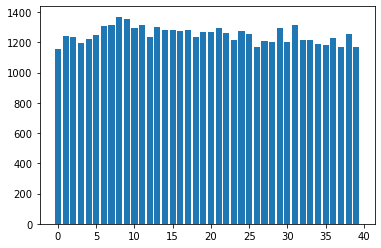

In [10]:
plt.bar(list(stats.keys()), list(stats.values()))
plt.show()

In [16]:
s = sum(stats.values())
dic={}
for k, v in stats.items():
    pct = v * 100.0 / s
    dic[k]= pct

2.314


p1_total = dict(functools.reduce(operator.add,
         map(collections.Counter, p1_games)))